In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
file_path = "dataset.xlsx"
df = pd.read_excel(file_path)

df.head()


,Subject,body,date,from
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,2010-03-25,johnny.palmer@enron.com
4,Bet,Since you never gave me the $20 for the last t...,2011-05-21,lydia.delgado@enron.com


In [14]:
df['Subject'] = df['Subject'].fillna('')
df['body'] = df['body'].fillna('')

### Combine subject and body into a single text column

In [15]:

df['Subject'] = df['Subject'].astype(str)
df['body'] = df['body'].astype(str)


df['Subject'] = df['Subject'].replace("nan", "")
df['body'] = df['body'].replace("nan", "")


df['text'] = df['Subject'] + " " + df['body']

# Show the result
df[['Subject', 'body', 'text']].head()


,Subject,body,text
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,EnronOptions Update! EnronOptions Announcement...
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...","(No Subject) Marc,\n\nUnfortunately, today is ..."
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",Phone Screen Interview - Shannon L. Burnham W...
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,RE: My new work email we were thinking papasit...
4,Bet,Since you never gave me the $20 for the last t...,Bet Since you never gave me the $20 for the la...


In [16]:
df['text'].head()

0    EnronOptions Update! EnronOptions Announcement...
1    (No Subject) Marc,\n\nUnfortunately, today is ...
2    Phone Screen  Interview - Shannon L. Burnham W...
3    RE: My new work email we were thinking papasit...
4    Bet Since you never gave me the $20 for the la...
Name: text, dtype: object

### cleaning datasets

In [17]:
import re

In [18]:
def clean_text(text):
    if text is None:
        return ""
    text = text.lower()                     
    text = re.sub(r'\n', ' ', text)         
    text = re.sub(r'http\S+', '', text)    
    text = re.sub(r'[^a-z0-9\s]', ' ', text)  
    text = re.sub(r'\s+', ' ', text).strip()  
    return text

df['clean_text'] = df['text'].apply(clean_text)

df[['text', 'clean_text']].head()


,text,clean_text
0,EnronOptions Update! EnronOptions Announcement...,enronoptions update enronoptions announcement ...
1,"(No Subject) Marc,\n\nUnfortunately, today is ...",no subject marc unfortunately today is not goi...
2,Phone Screen Interview - Shannon L. Burnham W...,phone screen interview shannon l burnham when ...
3,RE: My new work email we were thinking papasit...,re my new work email we were thinking papasito...
4,Bet Since you never gave me the $20 for the la...,bet since you never gave me the 20 for the las...


### Task1: Label using VADER 

In [23]:
import sys
import pandas as pd

#  Install & import NLTK VADER
!{sys.executable} -m pip install --quiet nltk

import nltk
nltk.download('vader_lexicon', quiet=True)
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [25]:

#  Ensure clean_text exists
if 'clean_text' not in df.columns:
    raise ValueError("Column 'clean_text' not found. Create it first by cleaning the combined text.")

#  Create the VADER analyzer and label function
sia = SentimentIntensityAnalyzer()

def vader_label(text):
    # treat empty or NaN as Neutral
    if pd.isna(text) or str(text).strip() == "":
        return "Neutral"
    score = sia.polarity_scores(str(text))['compound']
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

#  Apply VADER to create 'vader_sentiment' column
df['vader_sentiment'] = df['clean_text'].astype(str).apply(vader_label)


In [26]:
#  Provide a quick summary & sample output
print("Total rows:", len(df))
print("\nVADER sentiment distribution:")
print(df['vader_sentiment'].value_counts())

print("\nSample labeled rows (first 8):")
display(df[['Subject','body','clean_text','vader_sentiment']].head(8))



Total rows: 2191

VADER sentiment distribution:
vader_sentiment
Positive    1565
Neutral      380
Negative     246
Name: count, dtype: int64

Sample labeled rows (first 8):


,Subject,body,clean_text,vader_sentiment
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,enronoptions update enronoptions announcement ...,Positive
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",no subject marc unfortunately today is not goi...,Positive
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",phone screen interview shannon l burnham when ...,Neutral
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,re my new work email we were thinking papasito...,Neutral
4,Bet,Since you never gave me the $20 for the last t...,bet since you never gave me the 20 for the las...,Positive
5,RE: Favor,"sure, just call me the bank that delivers.\n \...",re favor sure just call me the bank that deliv...,Positive
6,MG Inventory Summaries,Inventory summaries for both MGL and MGMCC as ...,mg inventory summaries inventory summaries for...,Neutral
7,Forgot the Attachment,Please print attachment and make sure that e:m...,forgot the attachment please print attachment ...,Positive


In [27]:
# Save the labeled dataset
out_file = "labeled_with_vader.csv"
df.to_csv(out_file, index=False)
print(f"\nSaved labeled dataset to: {out_file}")


Saved labeled dataset to: labeled_with_vader.csv


# Generate TextBlob Sentiment

In [28]:
# Install TextBlob
import sys
!{sys.executable} -m pip install --quiet textblob
from textblob import TextBlob

In [30]:
# Define TextBlob labeling
def textblob_label(text):
    polarity = TextBlob(str(text)).sentiment.polarity
    if polarity > 0.05:
        return "Positive"
    elif polarity < -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply TextBlob
df['textblob_sentiment'] = df['clean_text'].apply(textblob_label)

# Summary
print("TextBlob Sentiment Distribution:")
print(df['textblob_sentiment'].value_counts())


TextBlob Sentiment Distribution:
textblob_sentiment
Positive    1261
Neutral      669
Negative     261
Name: count, dtype: int64


In [31]:
# View comparison sample
display(df[['clean_text','vader_sentiment','textblob_sentiment']].head(10))

,clean_text,vader_sentiment,textblob_sentiment
0,enronoptions update enronoptions announcement ...,Positive,Positive
1,no subject marc unfortunately today is not goi...,Positive,Neutral
2,phone screen interview shannon l burnham when ...,Neutral,Neutral
3,re my new work email we were thinking papasito...,Neutral,Neutral
4,bet since you never gave me the 20 for the las...,Positive,Neutral
5,re favor sure just call me the bank that deliv...,Positive,Positive
6,mg inventory summaries inventory summaries for...,Neutral,Neutral
7,forgot the attachment please print attachment ...,Positive,Positive
8,garvin brown axia sr power scheduler please ad...,Positive,Positive
9,more dallas ase information the start time for...,Negative,Positive


### Compare VADER vs TextBlob agreement

In [32]:
# Create a column that marks agreement or disagreement
df['agreement'] = df['vader_sentiment'] == df['textblob_sentiment']

# Calculate agreement rate
agreement_rate = df['agreement'].mean() * 100

print(f"Agreement Rate: {agreement_rate:.2f}%")

# Count how many agree/disagree
print("\nCounts:")
print(df['agreement'].value_counts())

# Show a few disagreement examples
print("\nSample Disagreement Cases:")
disagree_samples = df[df['agreement'] == False].head(10)
display(disagree_samples[['clean_text','vader_sentiment','textblob_sentiment']])


Agreement Rate: 63.08%

Counts:
agreement
True     1382
False     809
Name: count, dtype: int64

Sample Disagreement Cases:


,clean_text,vader_sentiment,textblob_sentiment
1,no subject marc unfortunately today is not goi...,Positive,Neutral
4,bet since you never gave me the 20 for the las...,Positive,Neutral
9,more dallas ase information the start time for...,Negative,Positive
11,re family reunion i will go larry w bass lwbth...,Neutral,Negative
12,no subject please remove me from your email li...,Neutral,Positive
13,re trades kiss my ass now bitch from bryan hul...,Negative,Neutral
16,game at 8 for your info how are you today,Neutral,Negative
20,firstenergy system to american transmission sy...,Positive,Neutral
21,desk info sheet t jae black east power trading...,Neutral,Negative
23,call laddie for house party 1 mom dad 2 troy a...,Positive,Negative


<span style="color:green; font-size:18px; font-weight:bold;">
VADER was selected as the final labeling model after comparison with TextBlob.
</span>  

#### TextBlob was used for cross-validation only, not for final outputs.


#  EDA  Basic dataset inspection

In [36]:

# Shape of the dataset
print("Dataset Shape (rows, columns):")
print(df.shape)

#  Column names
print("\nColumn Names:")
print(df.columns.tolist())

#  Data types of each column
print("\nData Types:")
print(df.dtypes)

#  Missing values in each column
print("\nMissing Values:")
print(df.isnull().sum())

#  Check for duplicate rows
print("\nDuplicate Rows Count:")
print(df.duplicated().sum())

Dataset Shape (rows, columns):
(2191, 9)

Column Names:
['Subject', 'body', 'date', 'from', 'text', 'clean_text', 'vader_sentiment', 'textblob_sentiment', 'agreement']

Data Types:
Subject                       object
body                          object
date                  datetime64[ns]
from                          object
text                          object
clean_text                    object
vader_sentiment               object
textblob_sentiment            object
agreement                       bool
dtype: object

Missing Values:
Subject               0
body                  0
date                  0
from                  0
text                  0
clean_text            0
vader_sentiment       0
textblob_sentiment    0
agreement             0
dtype: int64

Duplicate Rows Count:
0


##  EDA Sentiment Distribution

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

#  Count of each sentiment
sentiment_counts = df['vader_sentiment'].value_counts()

print("Sentiment Counts:")
print(sentiment_counts)

# Percentage distribution
sentiment_percentage = df['vader_sentiment'].value_counts(normalize=True) * 100

print("\nSentiment Percentage (%):")
print(sentiment_percentage.round(2))

Sentiment Counts:
vader_sentiment
Positive    1565
Neutral      380
Negative     246
Name: count, dtype: int64

Sentiment Percentage (%):
vader_sentiment
Positive    71.43
Neutral     17.34
Negative    11.23
Name: proportion, dtype: float64


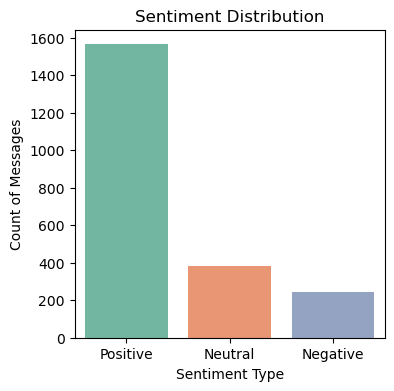

In [49]:
#  Bar Chart Visualization
plt.figure(figsize=(4,4))
sns.countplot(x='vader_sentiment', data=df, palette='Set2', hue='vader_sentiment')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Type")
plt.ylabel("Count of Messages")
plt.show()

## EDA: Time Trend Analysis

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
#  Ensure 'date' column exists and is datetime
# Change 'date' to your actual date column name if different
date_col = 'date'  # update if needed

if date_col not in df.columns:
    raise ValueError(f"Date column '{date_col}' not found. Check column names: {df.columns.tolist()}")

# Convert to datetime (coerce errors to NaT)
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

# Check how many rows failed to parse
bad_dates = df[date_col].isna().sum()
print(f"Rows with unparseable/missing dates: {bad_dates}")


Rows with unparseable/missing dates: 0


In [57]:
# Create year_month column for grouping (string YYYY-MM)
df['year_month'] = df[date_col].dt.to_period('M').astype(str)


In [73]:
# Monthly message volume
monthly_counts = df.groupby('year_month').size().reset_index(name='message_count')
print("\nMessages per month (sample):")
display(monthly_counts.head(14))


Messages per month (sample):


,year_month,message_count
0,2010-01,91
1,2010-02,91
2,2010-03,91
3,2010-04,92
4,2010-05,91
5,2010-06,92
6,2010-07,91
7,2010-08,91
8,2010-09,91
9,2010-10,91


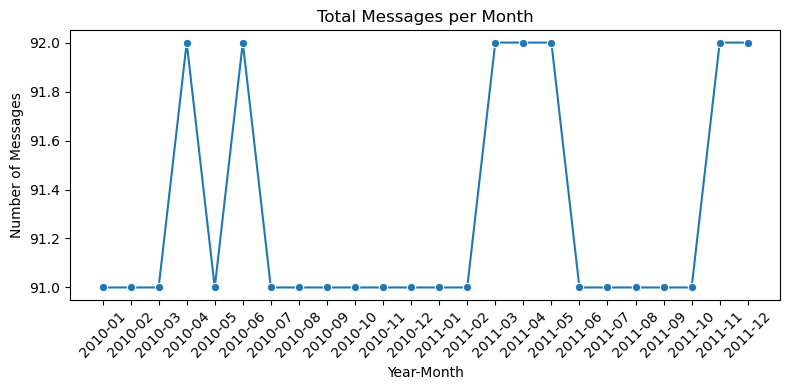

In [66]:
# Plot total messages per month
plt.figure(figsize=(8,4))
sns.lineplot(data=monthly_counts, x='year_month', y='message_count', marker='o')
plt.xticks(rotation=45)
plt.title('Total Messages per Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Messages')
plt.tight_layout()
plt.show()

In [74]:
#  Monthly sentiment counts (pivot)
sentiment_month = df.groupby(['year_month','vader_sentiment']).size().reset_index(name='count')
pivot_sent = sentiment_month.pivot(index='year_month', columns='vader_sentiment', values='count').fillna(0)

print("\nMonthly sentiment counts (pivot):")
display(pivot_sent.head(12))


Monthly sentiment counts (pivot):


vader_sentiment,Negative,Neutral,Positive
year_month,,,
2010-01,14,15,62
2010-02,12,23,56
2010-03,13,18,60
2010-04,9,18,65
2010-05,9,19,63
2010-06,10,19,63
2010-07,12,15,64
2010-08,9,16,66
2010-09,10,18,63


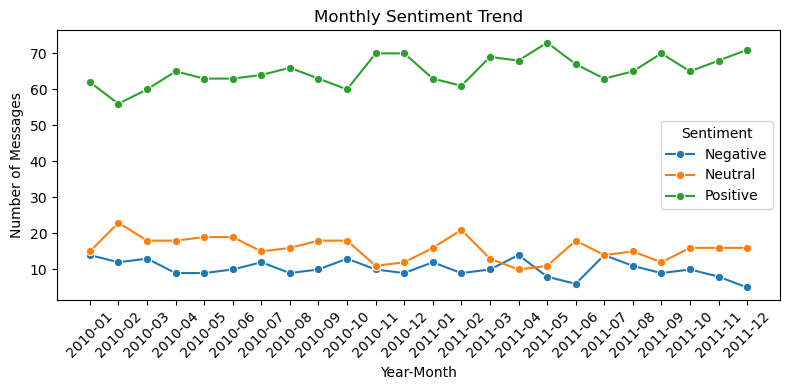

In [75]:
# Plot monthly sentiment trends 
plt.figure(figsize=(8,4))
for col in pivot_sent.columns:
    sns.lineplot(x=pivot_sent.index, y=pivot_sent[col], data=pivot_sent, marker='o', label=col)
plt.xticks(rotation=45)
plt.title('Monthly Sentiment Trend')
plt.xlabel('Year-Month')
plt.ylabel('Number of Messages')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

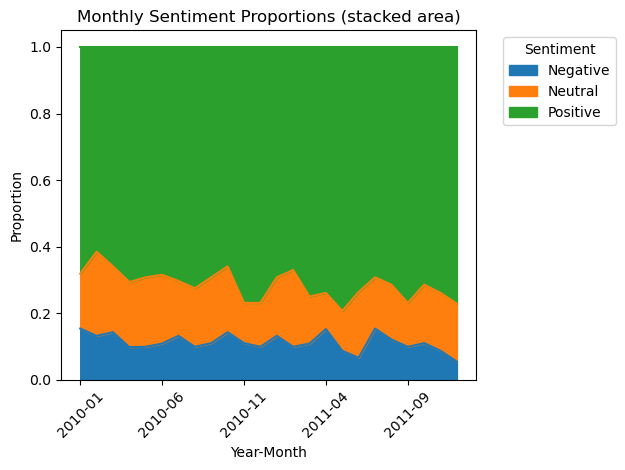

In [76]:
# Stacked area plot to show proportions
pivot_prop = pivot_sent.div(pivot_sent.sum(axis=1), axis=0)  # proportions per month
plt.figure(figsize=(8,5))
pivot_prop.plot(kind='area',stacked=True)
plt.xticks(rotation=45)
plt.title('Monthly Sentiment Proportions (stacked area)')
plt.xlabel('Year-Month')
plt.ylabel('Proportion')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## EDA : Employee-Level Patterns and Behavior


In [81]:
# ----- STEP 1: Total emails per employee -----
employee_message_count = df['from'].value_counts()
print("Top 10 employees by number of emails:")
display(employee_message_count.head(10))

Top 10 employees by number of emails:


from
lydia.delgado@enron.com        284
john.arnold@enron.com          256
sally.beck@enron.com           227
patti.thompson@enron.com       225
bobette.riner@ipgdirect.com    217
don.baughman@enron.com         213
johnny.palmer@enron.com        213
eric.bass@enron.com            210
kayne.coulter@enron.com        174
rhonda.denton@enron.com        172
Name: count, dtype: int64

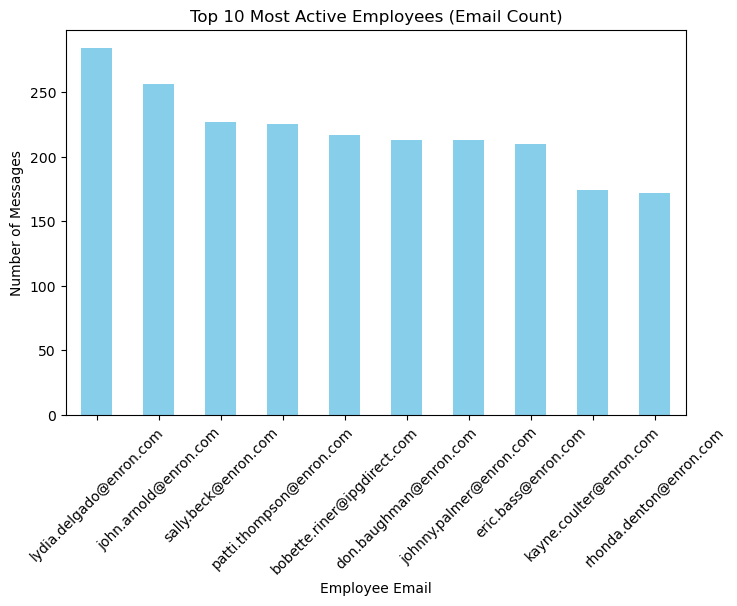

In [82]:
# Bar chart
plt.figure(figsize=(8,5))
employee_message_count.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Active Employees (Email Count)")
plt.xlabel("Employee Email")
plt.ylabel("Number of Messages")
plt.xticks(rotation=45)
plt.show()

In [83]:
# ----- STEP 2: Sentiment counts per employee -----
employee_sentiment = df.groupby(['from','vader_sentiment']).size().unstack(fill_value=0)
print("\nSentiment per Employee (sample):")
display(employee_sentiment.head(10))


Sentiment per Employee (sample):


vader_sentiment,Negative,Neutral,Positive
from,,,
bobette.riner@ipgdirect.com,38,29,150
don.baughman@enron.com,19,49,145
eric.bass@enron.com,24,27,159
john.arnold@enron.com,21,46,189
johnny.palmer@enron.com,23,40,150
kayne.coulter@enron.com,27,25,122
lydia.delgado@enron.com,24,58,202
patti.thompson@enron.com,23,33,169
rhonda.denton@enron.com,14,36,122


In [84]:
# ----- STEP 3: Top Negative Employees -----
top_negative = employee_sentiment.sort_values(by='Negative', ascending=False).head(10)
print("\nTop 10 Employees with Most Negative Messages:")
display(top_negative)


Top 10 Employees with Most Negative Messages:


vader_sentiment,Negative,Neutral,Positive
from,,,
bobette.riner@ipgdirect.com,38,29,150
sally.beck@enron.com,33,37,157
kayne.coulter@enron.com,27,25,122
lydia.delgado@enron.com,24,58,202
eric.bass@enron.com,24,27,159
patti.thompson@enron.com,23,33,169
johnny.palmer@enron.com,23,40,150
john.arnold@enron.com,21,46,189
don.baughman@enron.com,19,49,145


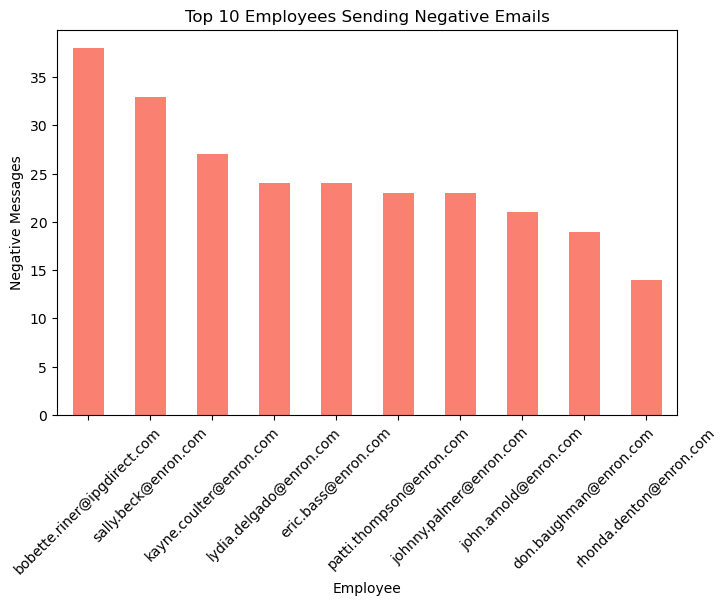

In [85]:
plt.figure(figsize=(8,5))
top_negative['Negative'].plot(kind='bar', color='salmon')
plt.title("Top 10 Employees Sending Negative Emails")
plt.xlabel("Employee")
plt.ylabel("Negative Messages")
plt.xticks(rotation=45)
plt.show()


Top 10 Employees with Most Positive Messages:


vader_sentiment,Negative,Neutral,Positive
from,,,
lydia.delgado@enron.com,24,58,202
john.arnold@enron.com,21,46,189
patti.thompson@enron.com,23,33,169
eric.bass@enron.com,24,27,159
sally.beck@enron.com,33,37,157
bobette.riner@ipgdirect.com,38,29,150
johnny.palmer@enron.com,23,40,150
don.baughman@enron.com,19,49,145
kayne.coulter@enron.com,27,25,122


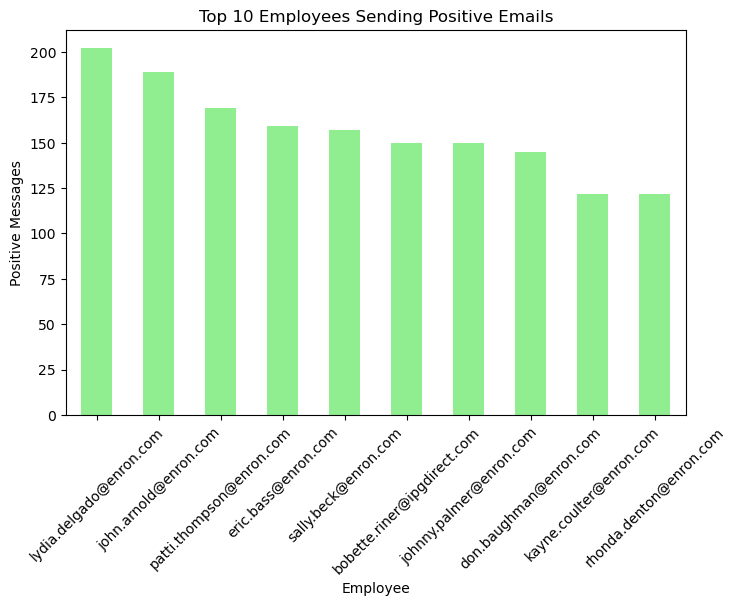

In [86]:
# ----- STEP 4: Top Positive Employees -----
top_positive = employee_sentiment.sort_values(by='Positive', ascending=False).head(10)
print("\nTop 10 Employees with Most Positive Messages:")
display(top_positive)



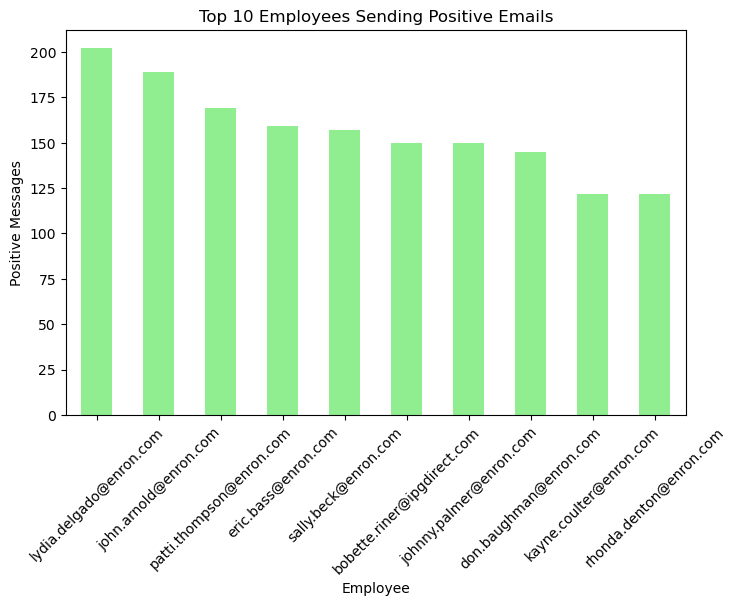

In [94]:
plt.figure(figsize=(8,5))
top_positive['Positive'].plot(kind='bar', color='lightgreen')
plt.title("Top 10 Employees Sending Positive Emails")
plt.xlabel("Employee")
plt.ylabel("Positive Messages")
plt.xticks(rotation=45)
plt.show()

In [88]:

# ----- STEP 5: Average message length per employee -----
df['text_length'] = df['clean_text'].apply(len)

avg_length = df.groupby('from')['text_length'].mean().sort_values(ascending=False)
print("\nTop 10 Employees by Average Message Length:")
display(avg_length.head(10))





Top 10 Employees by Average Message Length:


from
eric.bass@enron.com            271.814286
john.arnold@enron.com          271.015625
patti.thompson@enron.com       270.391111
kayne.coulter@enron.com        261.114943
lydia.delgado@enron.com        257.531690
sally.beck@enron.com           255.977974
bobette.riner@ipgdirect.com    254.682028
johnny.palmer@enron.com        250.765258
don.baughman@enron.com         245.079812
rhonda.denton@enron.com        237.482558
Name: text_length, dtype: float64

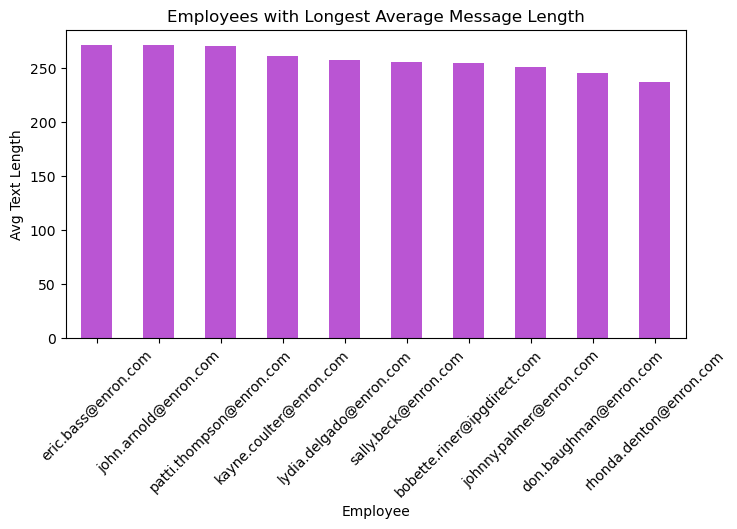

In [93]:
plt.figure(figsize=(8,4))
avg_length.head(10).plot(kind='bar', color='mediumorchid')
plt.title("Employees with Longest Average Message Length")
plt.xlabel("Employee")
plt.ylabel("Avg Text Length")
plt.xticks(rotation=45)
plt.show()

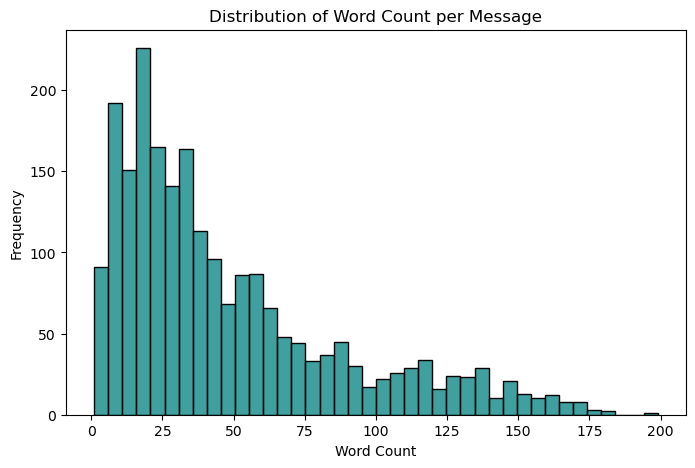

In [95]:


# Compute word count per message
df['word_count'] = df['clean_text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8,5))
sns.histplot(df['word_count'], bins=40, color='teal')
plt.title("Distribution of Word Count per Message")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


In [96]:
from collections import Counter

# Combine all words
all_words = " ".join(df['clean_text']).split()

# Find 20 most common words
common_words = Counter(all_words).most_common(20)
common_words


[('the', 3483),
 ('to', 2800),
 ('you', 1928),
 ('and', 1787),
 ('i', 1654),
 ('for', 1564),
 ('a', 1243),
 ('in', 1166),
 ('of', 1163),
 ('on', 1053),
 ('will', 972),
 ('is', 934),
 ('your', 873),
 ('have', 848),
 ('that', 837),
 ('be', 803),
 ('this', 758),
 ('we', 699),
 ('re', 673),
 ('please', 632)]

In [97]:
positive_words = " ".join(df[df['vader_sentiment']=='Positive']['clean_text']).split()
Counter(positive_words).most_common(20)


[('the', 2918),
 ('to', 2435),
 ('you', 1634),
 ('and', 1556),
 ('i', 1378),
 ('for', 1296),
 ('a', 1069),
 ('in', 1037),
 ('of', 1013),
 ('on', 871),
 ('will', 813),
 ('have', 748),
 ('your', 738),
 ('is', 723),
 ('that', 718),
 ('be', 684),
 ('this', 641),
 ('we', 615),
 ('please', 607),
 ('with', 521)]

In [98]:
negative_words = " ".join(df[df['vader_sentiment']=='Negative']['clean_text']).split()
Counter(negative_words).most_common(20)


[('the', 314),
 ('to', 215),
 ('i', 160),
 ('you', 157),
 ('no', 147),
 ('for', 129),
 ('is', 125),
 ('and', 121),
 ('a', 107),
 ('on', 92),
 ('will', 88),
 ('subject', 88),
 ('of', 80),
 ('that', 79),
 ('your', 76),
 ('re', 68),
 ('be', 66),
 ('with', 66),
 ('in', 66),
 ('this', 62)]

In [103]:
import sys
!{sys.executable} -m pip install --quiet wordcloud


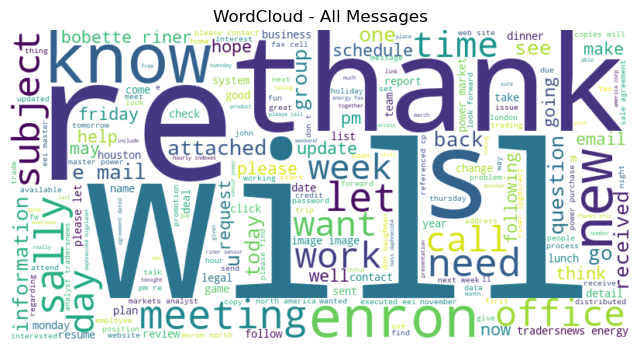

In [105]:
from wordcloud import WordCloud

# Overall wordcloud
text_all = " ".join(df['clean_text'])

wc_all = WordCloud(width=800, height=400, background_color='white').generate(text_all)

plt.figure(figsize=(8,6))
plt.imshow(wc_all, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - All Messages")
plt.show()

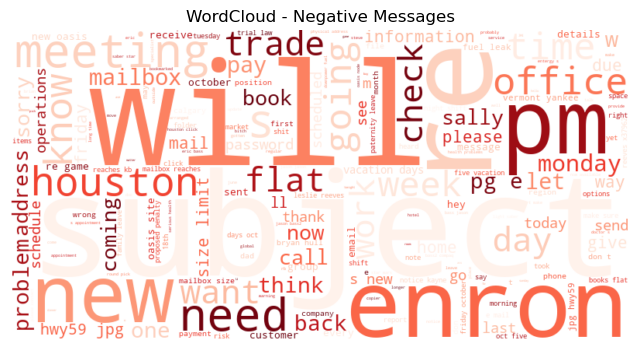

In [109]:
# Negative wordcloud
text_neg = " ".join(df[df['vader_sentiment']=='Negative']['clean_text'])

wc_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(text_neg)

plt.figure(figsize=(8,6))
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Negative Messages")
plt.show()

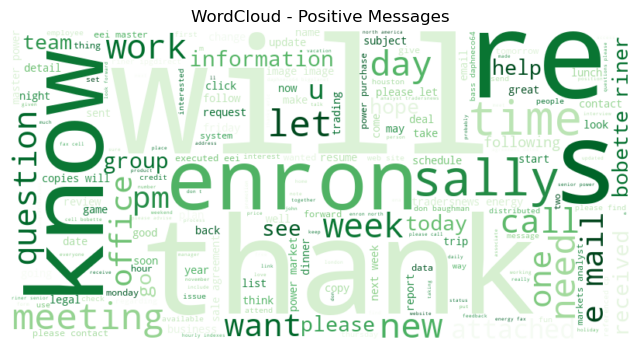

In [108]:

# Positive wordcloud
text_pos = " ".join(df[df['vader_sentiment']=='Positive']['clean_text'])

wc_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(text_pos)

plt.figure(figsize=(8,6))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Positive Messages")
plt.show()


# Task 3: Monthly Sentiment Score for Each Employee

In [113]:
# Task 3: Monthly Sentiment Score for Each Employee

# STEP 1: Assign score to each message
score_map = {
    "Positive": 1,
    "Neutral": 0,
    "Negative": -1
}

df['score'] = df['vader_sentiment'].map(score_map)

# STEP 2: Check the new score column
print("Sample rows with scores:")
display(df[['from','year_month','vader_sentiment','score']].head())

# STEP 3: Group by employee + month
monthly_scores = df.groupby(['from', 'year_month'])['score'].sum().reset_index()

# STEP 4: Display sample of monthly scores
print("\nMonthly Sentiment Scores (sample):")
display(monthly_scores.head(5))

# STEP 5: Save for next tasks (ranking, risk analysis)
monthly_scores.to_csv("employee_monthly_sentiment_scores.csv", index=False)
print("\nSaved as employee_monthly_sentiment_scores.csv")


Sample rows with scores:


,from,year_month,vader_sentiment,score
0,sally.beck@enron.com,2010-05,Positive,1
1,eric.bass@enron.com,2010-07,Positive,1
2,sally.beck@enron.com,2011-07,Neutral,0
3,johnny.palmer@enron.com,2010-03,Neutral,0
4,lydia.delgado@enron.com,2011-05,Positive,1



Monthly Sentiment Scores (sample):


,from,year_month,score
0,bobette.riner@ipgdirect.com,2010-01,1
1,bobette.riner@ipgdirect.com,2010-02,7
2,bobette.riner@ipgdirect.com,2010-03,4
3,bobette.riner@ipgdirect.com,2010-04,5
4,bobette.riner@ipgdirect.com,2010-05,2



Saved as employee_monthly_sentiment_scores.csv


In [117]:
# Number of unique employees
num_employees = df['from'].nunique()

print("Number of unique employees:", num_employees)

# Optional: list first 10 employee email IDs
df['from'].unique()[:]


Number of unique employees: 10


array(['sally.beck@enron.com', 'eric.bass@enron.com',
       'johnny.palmer@enron.com', 'lydia.delgado@enron.com',
       'kayne.coulter@enron.com', 'patti.thompson@enron.com',
       'rhonda.denton@enron.com', 'don.baughman@enron.com',
       'john.arnold@enron.com', 'bobette.riner@ipgdirect.com'],
      dtype=object)

## Task 4 :Employee Ranking

In [118]:
# Ensure monthly_scores exists
monthly_scores.head()


,from,year_month,score
0,bobette.riner@ipgdirect.com,2010-01,1
1,bobette.riner@ipgdirect.com,2010-02,7
2,bobette.riner@ipgdirect.com,2010-03,4
3,bobette.riner@ipgdirect.com,2010-04,5
4,bobette.riner@ipgdirect.com,2010-05,2


In [119]:
# Top 3 positive employees per month
top_positive = (
    monthly_scores
    .sort_values(['year_month', 'score', 'from'], ascending=[True, False, True])  # month ASC, score DESC, alphabetical
    .groupby('year_month')
    .head(3)  # top 3 per month
)

print("Top 3 Positive Employees Per Month:")
display(top_positive)


Top 3 Positive Employees Per Month:


,from,year_month,score
120,kayne.coulter@enron.com,2010-01,10
48,eric.bass@enron.com,2010-01,8
144,lydia.delgado@enron.com,2010-01,8
73,john.arnold@enron.com,2010-02,12
97,johnny.palmer@enron.com,2010-02,10
...,...,...,...
94,john.arnold@enron.com,2011-11,10
190,patti.thompson@enron.com,2011-11,9
71,eric.bass@enron.com,2011-12,13
191,patti.thompson@enron.com,2011-12,12


In [120]:
# Top 3 negative employees per month
top_negative = (
    monthly_scores
    .sort_values(['year_month', 'score', 'from'], ascending=[True, True, True])  # month ASC, score ASC, alphabetical
    .groupby('year_month')
    .head(3)  # bottom 3 per month
)

print("Top 3 Negative Employees Per Month:")
display(top_negative)


Top 3 Negative Employees Per Month:


,from,year_month,score
0,bobette.riner@ipgdirect.com,2010-01,1
192,rhonda.denton@enron.com,2010-01,1
216,sally.beck@enron.com,2010-01,2
121,kayne.coulter@enron.com,2010-02,-1
145,lydia.delgado@enron.com,2010-02,1
...,...,...,...
214,rhonda.denton@enron.com,2011-11,2
166,lydia.delgado@enron.com,2011-11,3
119,johnny.palmer@enron.com,2011-12,1
23,bobette.riner@ipgdirect.com,2011-12,3


In [121]:
top_positive.to_csv("top3_positive_employees.csv", index=False)
top_negative.to_csv("top3_negative_employees.csv", index=False)

print("Saved ranking files:")
print(" - top3_positive_employees.csv")
print(" - top3_negative_employees.csv")


Saved ranking files:
 - top3_positive_employees.csv
 - top3_negative_employees.csv


## Task 5: Flight Risk Identification

In [131]:
import pandas as pd

# Step 1: Filter negative messages
negative_df = df[df['vader_sentiment'] == 'Negative'][['from', 'date']].copy()

# Ensure date is datetime
negative_df['date'] = pd.to_datetime(negative_df['date'], errors='coerce')

# Step 2: Sort by employee and date
negative_df = negative_df.sort_values(by=['from', 'date'])

flight_risk_employees = []

In [132]:
# Step 3: Rolling 30-day window check
for employee, group in negative_df.groupby('from'):
    dates = group['date'].tolist()
    
    for i in range(len(dates)):
        start_date = dates[i]
        end_date = start_date + pd.Timedelta(days=30)
        
        # Convert list -> Pandas Series for comparison
        date_series = pd.Series(dates)
        
        # Count negative messages in 30-day window
        count = ((date_series >= start_date) & (date_series <= end_date)).sum()
        
        if count >= 4:
            flight_risk_employees.append(employee)
            break  # No need to check further
    

In [133]:
# Step 4: Unique list of flight risk employees
flight_risk_employees = list(set(flight_risk_employees))

print("\n🚨 Flight Risk Employees:")
print(flight_risk_employees)


🚨 Flight Risk Employees:
['don.baughman@enron.com', 'sally.beck@enron.com', 'patti.thompson@enron.com', 'eric.bass@enron.com', 'kayne.coulter@enron.com', 'johnny.palmer@enron.com', 'lydia.delgado@enron.com', 'john.arnold@enron.com', 'bobette.riner@ipgdirect.com']


In [134]:
# Save the list
pd.DataFrame({'flight_risk': flight_risk_employees}).to_csv("flight_risk_employees.csv", index=False)
print("\nSaved as flight_risk_employees.csv")


Saved as flight_risk_employees.csv


###  Build modeling dataset

In [135]:
# Step 6.1: Build modeling dataset
import pandas as pd
import numpy as np

# Ensure required columns exist
# df: original labeled dataframe with columns ['from','year_month','clean_text','vader_sentiment','score'] (score exists per message)
# monthly_scores: earlier grouped table with sum of scores per employee-month

# If monthly_scores does not exist, create from df:
if 'monthly_scores' not in globals():
    monthly_scores = df.groupby(['from','year_month'])['score'].sum().reset_index()

# Feature 1: message_count per employee-month
msg_count = df.groupby(['from','year_month']).size().reset_index(name='message_count')

# Feature 2: average message length (chars) per employee-month
df['text_length'] = df['clean_text'].astype(str).apply(len)
avg_len = df.groupby(['from','year_month'])['text_length'].mean().reset_index(name='avg_length')

# Feature 3: word count total per employee-month
df['word_count_msg'] = df['clean_text'].astype(str).apply(lambda x: len(x.split()))
word_count = df.groupby(['from','year_month'])['word_count_msg'].sum().reset_index(name='word_count')

# Feature 4: counts of Positive/Negative/Neutral per employee-month
sent_counts = df.groupby(['from','year_month','vader_sentiment']).size().unstack(fill_value=0).reset_index()
# Ensure all columns exist
for col in ['Positive','Negative','Neutral']:
    if col not in sent_counts.columns:
        sent_counts[col] = 0

# Merge all features into one DF
model_df = monthly_scores.merge(msg_count, on=['from','year_month'], how='left') \
                         .merge(avg_len, on=['from','year_month'], how='left') \
                         .merge(word_count, on=['from','year_month'], how='left') \
                         .merge(sent_counts[['from','year_month','Positive','Negative','Neutral']], on=['from','year_month'], how='left')

# Fill NaNs (if any) with zeros
model_df[['message_count','avg_length','word_count','Positive','Negative','Neutral']] = model_df[['message_count','avg_length','word_count','Positive','Negative','Neutral']].fillna(0)

print("Model dataset shape:", model_df.shape)
display(model_df.head())


Model dataset shape: (240, 9)


,from,year_month,score,message_count,avg_length,word_count,Positive,Negative,Neutral
0,bobette.riner@ipgdirect.com,2010-01,1,2,151.500000,52,1,0,1
1,bobette.riner@ipgdirect.com,2010-02,7,14,286.571429,703,9,2,3
2,bobette.riner@ipgdirect.com,2010-03,4,11,278.909091,558,6,2,3
3,bobette.riner@ipgdirect.com,2010-04,5,6,231.666667,238,5,0,1
4,bobette.riner@ipgdirect.com,2010-05,2,4,178.750000,130,3,1,0


###  Select features and target




In [138]:

feature_cols = ['message_count','avg_length','word_count','Positive','Negative','Neutral']
target_col = 'score'

X = model_df[feature_cols].copy()
y = model_df[target_col].copy()

# Quick correlation table
corr = model_df[feature_cols + [target_col]].corr()
print("Correlation with target (score):")
display(corr[target_col].sort_values(ascending=False))



Correlation with target (score):


score            1.000000
Positive         0.962770
message_count    0.859574
word_count       0.821487
Neutral          0.426420
Negative         0.142420
avg_length       0.131418
Name: score, dtype: float64

In [139]:
# Show a small sample of X,y
display(X.head())
display(y.head())

,message_count,avg_length,word_count,Positive,Negative,Neutral
0,2,151.500000,52,1,0,1
1,14,286.571429,703,9,2,3
2,11,278.909091,558,6,2,3
3,6,231.666667,238,5,0,1
4,4,178.750000,130,3,1,0


0    1
1    7
2    4
3    5
4    2
Name: score, dtype: int64

### Train-test split and scaling

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (192, 6) Test shape: (48, 6)


### Train Linear Regression

In [141]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

print("Model trained.")


Model trained.


### Evaluate the model

In [143]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

# Metrics
def regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

train_metrics = regression_metrics(y_train, y_train_pred)
test_metrics = regression_metrics(y_test, y_test_pred)

print("Train metrics:", train_metrics)
print("Test metrics:", test_metrics)

Train metrics: {'MAE': 2.1880645443654126e-15, 'MSE': 7.615383790766383e-30, 'RMSE': np.float64(2.759598483614307e-15), 'R2': 1.0}
Test metrics: {'MAE': 2.0539125955565396e-15, 'MSE': 6.886098318491748e-30, 'RMSE': np.float64(2.624137633298175e-15), 'R2': 1.0}


In [144]:
# Coefficients (map back to original feature names)
coefs = pd.Series(lr.coef_, index=feature_cols).sort_values(key=abs, ascending=False)
print("\nFeature coefficients (sorted by absolute impact):")
display(coefs)


Feature coefficients (sorted by absolute impact):


Positive         2.985772e+00
message_count    1.828211e+00
Negative        -1.538995e+00
Neutral         -4.474736e-01
word_count       1.790847e-15
avg_length      -2.310506e-16
dtype: float64

###  Actual vs Predicted and Residuals

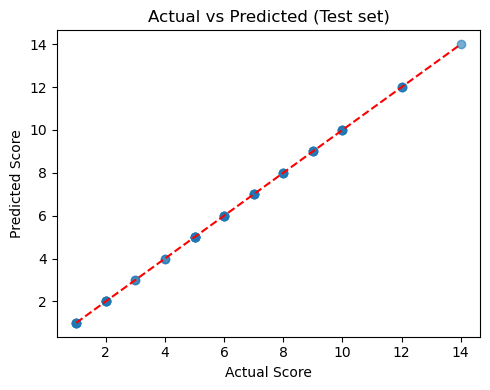

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted (Test set)")
plt.tight_layout()
plt.show()

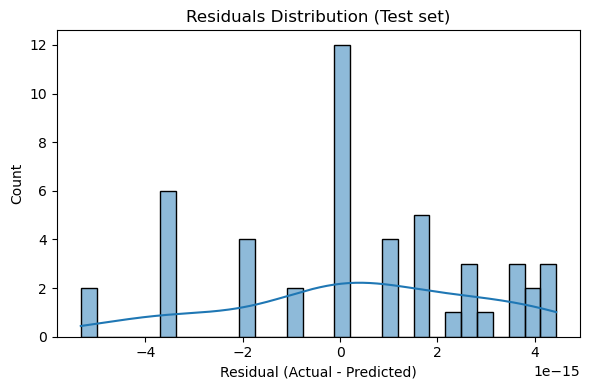

In [150]:
# Residuals
residuals = y_test - y_test_pred
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residuals Distribution (Test set)")
plt.xlabel("Residual (Actual - Predicted)")
plt.tight_layout()
plt.show()

###  Interpretation 

In [152]:
# Interpretation and save
# Simple interpretation printout
print("Interpretation hint:")
for feat, coef in coefs.items():
    direction = "increase" if coef>0 else "decrease"
    print(f" - {feat}: a 1-std increase tends to {direction} the monthly score (coef={coef:.4f})")

# Save model and scaler
import joblib
joblib.dump(lr, "linear_regression_sentiment_model.joblib")
joblib.dump(scaler, "scaler.joblib")
print("\nSaved model -> linear_regression_sentiment_model.joblib")
print("Saved scaler -> scaler.joblib")


Interpretation hint:
 - Positive: a 1-std increase tends to increase the monthly score (coef=2.9858)
 - message_count: a 1-std increase tends to increase the monthly score (coef=1.8282)
 - Negative: a 1-std increase tends to decrease the monthly score (coef=-1.5390)
 - Neutral: a 1-std increase tends to decrease the monthly score (coef=-0.4475)
 - word_count: a 1-std increase tends to increase the monthly score (coef=0.0000)
 - avg_length: a 1-std increase tends to decrease the monthly score (coef=-0.0000)

Saved model -> linear_regression_sentiment_model.joblib
Saved scaler -> scaler.joblib


In [154]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predictions
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

# R2 (accuracy for regression)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train R² Score:", train_r2)
print("Test R² Score:", test_r2)

Train R² Score: 1.0
Test R² Score: 1.0


In [155]:
# Extra metrics
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

print("\nTest MAE:", mae)
print("Test MSE:", mse)
print("Test RMSE:", rmse)


Test MAE: 2.0539125955565396e-15
Test MSE: 6.886098318491748e-30
Test RMSE: 2.624137633298175e-15


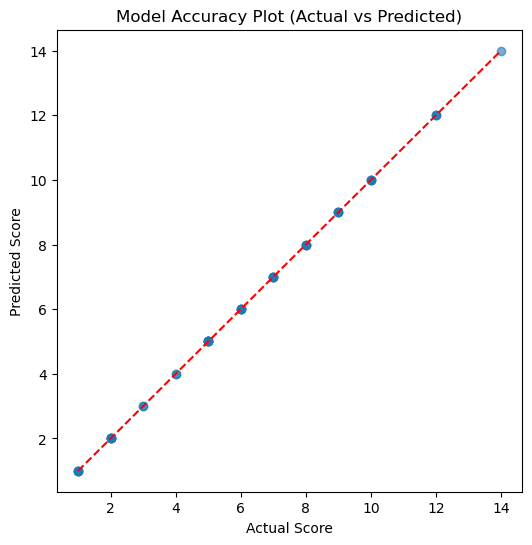

In [156]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Model Accuracy Plot (Actual vs Predicted)")
plt.show()